## task 1: data loading

In [1]:
################# Data description and pre-processing #################
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sn
import sklearn
import statsmodels
import statsmodels.api as sm
from matplotlib import rcParams
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.utils import resample
import seaborn as sns

# Style settings
rcParams["font.family"] = "serif"
plt.style.use("fast")

In [2]:
############################ loading data ############################
df = pd.read_csv("ttransporte.csv")
data = pd.read_csv("tviaje.csv")

## task 2: Data prepossing(use 'df')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 890748 entries, 0 to 890747
Data columns (total 18 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id_tra     890748 non-null  int64  
 1   id_via     890748 non-null  int64  
 2   p5_3       890748 non-null  int64  
 3   n_via      890748 non-null  int64  
 4   p5_14      890748 non-null  int64  
 5   p5_16      890748 non-null  int64  
 6   p5_16_1_1  890748 non-null  int64  
 7   p5_16_1_2  890748 non-null  int64  
 8   p5_16_2    274526 non-null  float64
 9   p5_17_1c   87931 non-null   float64
 10  p5_17_2c   87931 non-null   float64
 11  estrato    890748 non-null  int64  
 12  factor     890748 non-null  int64  
 13  upm_dis    890748 non-null  int64  
 14  est_dis    890748 non-null  int64  
 15  tloc       890748 non-null  int64  
 16  sexo       890748 non-null  int64  
 17  edad       890748 non-null  int64  
dtypes: float64(3), int64(15)
memory usage: 122.3 MB


In [4]:
# Select columns
use_col = ["id_via", "p5_14", "estrato", "tloc", "sexo", "edad"]
df1 = df.loc[:, use_col]

# Drop NA
df1.dropna(inplace=True)

df1["sexo"] = df1["sexo"].astype("category")
df1["p5_14"] = df1["p5_14"].astype("category")
df1["estrato"] = df1["estrato"].astype("category")
df1["tloc"] = df1["tloc"].astype("category")

df1.describe()

,id_via,edad
count,890748.000000,890748.000000
mean,264509.033144,36.598541
std,154149.320506,17.271761
min,1.000000,6.000000
25%,133398.750000,23.000000
50%,257202.500000,35.000000
75%,398929.250000,49.000000
max,531594.000000,97.000000


In [5]:
#Split the dataframe into two based on gender
df_f = df1[df1["sexo"] == 2].copy() # female
df_m = df1[df1["sexo"] == 1].copy() # male

In [6]:
#Divide the travel purpose column into 2 categories: cycling and others
category_mapping = {
    1: "Others",  # 私人交通工具 (Automóvil)
    9: "Bicycles and Motorcycles",  # 自行车与摩托车 (Moto)
    3: "Others",  # 出租车服务 (Taxi - App-based)
    4: "Others",  # 出租车服务 (Taxi - Street)
    16: "Others",  # 出租车服务 (Bicycle Taxi)
    17: "Others",  # 出租车服务 (Motorcycle Taxi)
    7: "Bicycles and Motorcycles",  # 自行车与摩托车 (Bicicleta)
    14: "Others",  # 步行
    2: "Others",  # 公共交通-巴士类 (Shared Bus/Minibus)
    5: "Others",  # 公共交通-轨道类 (Metro)
    6: "Others",  # 公共交通-巴士类 (City Bus)
    8: "Others",  # 公共交通-巴士类 (Bus)
    10: "Others",  # 公共交通-巴士类 (Trolleybus)
    11: "Others",  # 公共交通-巴士类 (Bus Rapid Transit)
    12: "Others",  # 公共交通-轨道类 (Light Rail)
    13: "Others",  # 公共交通-轨道类 (Suburban Train)
    15: "Others",  # 公共交通-轨道类 (Cable Car)
    18: "Others",  # 公共交通-巴士类 (School Bus)
    19: "Others",  # 公共交通-巴士类 (Employee Transportation)
}

df_f["p5_14"] = df_f["p5_14"].map(category_mapping)
df_m["p5_14"] = df_m["p5_14"].map(category_mapping)
df1["p5_14"] = df1["p5_14"].map(category_mapping)

# Drop NA
df_f.dropna(subset="p5_14", inplace=True)
df_m.dropna(subset="p5_14", inplace=True)
df1.dropna(subset="p5_14", inplace=True)

### task 3: Adding indenpendent varibles(use 'data')

In [7]:
# Select columns
use_col = ["id_via", "p5_11a", "p5_13", "p5_9_1", "p5_10_1"]

data = data.loc[:, use_col]
data["time"] = data["p5_10_1"] - data["p5_9_1"]

data.describe()

,id_via,p5_11a,p5_13,p5_9_1,p5_10_1,time
count,531594.000000,531594.000000,531594.000000,531594.000000,531594.000000,531594.000000
mean,265797.500000,3.282925,2.442148,12.562903,13.134428,0.571525
std,153458.113837,5.143013,2.910748,5.221655,5.234551,0.846379
min,1.000000,1.000000,1.000000,0.000000,0.000000,-23.000000
25%,132899.250000,1.000000,1.000000,8.000000,9.000000,0.000000
50%,265797.500000,2.000000,2.000000,12.000000,13.000000,0.000000
75%,398695.750000,5.000000,3.000000,16.000000,17.000000,1.000000
max,531594.000000,99.000000,99.000000,99.000000,99.000000,18.000000


In [8]:
#Table join (left join)
result1 = pd.merge(df_f, data, on="id_via")
result1 = result1[result1["time"] >= 0]

result2 = pd.merge(df_m, data, on="id_via")
result2 = result2[result2["time"] >= 0]

def categorize_time(hour):
    if hour <= 2:
        return "Short Time"
    elif 2 < hour <= 5:
        return "Medium Time"
    else:
        return "Long Time"


result1["Time Category"] = result1["time"].apply(categorize_time)
result1["p5_11a"] = result1["p5_11a"].astype("category")
result1["p5_13"] = result1["p5_13"].astype("category")

result2["Time Category"] = result2["time"].apply(categorize_time)
result2["p5_11a"] = result2["p5_11a"].astype("category")
result2["p5_13"] = result2["p5_13"].astype("category")

result1.head(10)

,id_via,p5_14,estrato,tloc,sexo,edad,p5_11a,p5_13,p5_9_1,p5_10_1,time,Time Category
0,1810,Others,3,1,2,55,1,1,15,15,0,Short Time
1,1810,Others,3,1,2,55,1,1,15,15,0,Short Time
2,1811,Others,3,1,2,38,3,2,6,8,2,Short Time
3,1811,Others,3,1,2,38,3,2,6,8,2,Short Time
4,1811,Others,3,1,2,38,3,2,6,8,2,Short Time
5,1811,Others,3,1,2,38,3,2,6,8,2,Short Time
6,1812,Others,3,1,2,38,1,1,18,19,1,Short Time
7,1812,Others,3,1,2,38,1,1,18,19,1,Short Time
8,1812,Others,3,1,2,38,1,1,18,19,1,Short Time
9,1812,Others,3,1,2,38,1,1,18,19,1,Short Time


In [9]:
def categorize_hour(hour):
    if 22 <= hour or hour < 6:
        return "Night"
    elif 6 <= hour < 12:
        return "Morning"
    elif 12 <= hour < 18:
        return "Afternoon"
    elif 18 <= hour < 20:
        return "Early Evening"
    elif 20 <= hour < 22:
        return "Evening"
    else:
        return "Invalid Hour"

result1["Departure Time"] = result1["p5_9_1"].apply(categorize_hour)
result1["End Time"] = result1["p5_10_1"].apply(categorize_hour)

result2["Departure Time"] = result2["p5_9_1"].apply(categorize_hour)
result2["End Time"] = result2["p5_10_1"].apply(categorize_hour)

result1.head(10)

,id_via,p5_14,estrato,tloc,sexo,edad,p5_11a,p5_13,p5_9_1,p5_10_1,time,Time Category,Departure Time,End Time
0,1810,Others,3,1,2,55,1,1,15,15,0,Short Time,Afternoon,Afternoon
1,1810,Others,3,1,2,55,1,1,15,15,0,Short Time,Afternoon,Afternoon
2,1811,Others,3,1,2,38,3,2,6,8,2,Short Time,Morning,Morning
3,1811,Others,3,1,2,38,3,2,6,8,2,Short Time,Morning,Morning
4,1811,Others,3,1,2,38,3,2,6,8,2,Short Time,Morning,Morning
5,1811,Others,3,1,2,38,3,2,6,8,2,Short Time,Morning,Morning
6,1812,Others,3,1,2,38,1,1,18,19,1,Short Time,Early Evening,Early Evening
7,1812,Others,3,1,2,38,1,1,18,19,1,Short Time,Early Evening,Early Evening
8,1812,Others,3,1,2,38,1,1,18,19,1,Short Time,Early Evening,Early Evening
9,1812,Others,3,1,2,38,1,1,18,19,1,Short Time,Early Evening,Early Evening


In [10]:
label_mapping = {
    1: 'Going home',
    2: 'Going to work',
    3: 'Going to school',
    4: 'Shopping',
    5: 'Going to sports or recreation',
    6: 'To pick up someone',
    7: 'To handle administrative',  # To handle administrative
    8: 'Receiving health care',  # Receiving health care
    9: 'Going to a religious event',  # Going to a religious event
    10: 'Other',  # Other
    99: 'Don_t know',  # "Don't know"
}


result1["p5_13"] = result1["p5_13"].map(label_mapping)
result2["p5_13"] = result2["p5_13"].map(label_mapping)

# Drop NA
result1.dropna(subset="p5_13", inplace=True)
result2.dropna(subset="p5_13", inplace=True)
result1.isnull().sum()

id_via            0
p5_14             0
estrato           0
tloc              0
sexo              0
edad              0
p5_11a            0
p5_13             0
p5_9_1            0
p5_10_1           0
time              0
Time Category     0
Departure Time    0
End Time          0
dtype: int64

### task 4: Preparation for Logistic regresseion

In [11]:
#Undersampling

from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import (
    RepeatedStratifiedKFold,
    cross_val_score,
    train_test_split,
)
from sklearn.utils import resample

###欠采样处理
# 合并 X 和 y
undersample = result2

# 获取每个类别的索引
class_indices = [
    undersample[undersample["p5_14"] == label].index for label in undersample["p5_14"].unique()
]

# 确定欠采样后的样本数量（以样本数量最多的类别为准）
undersampled_size = min(len(indices) for indices in class_indices)

undersampled_size

13374

In [12]:
# 从每个类别中随机删除一些样本，使得每个类别的样本数量相等
undersampled_indices = []
for indices in class_indices:
    undersampled_indices.extend(
        resample(indices, replace=False, n_samples=undersampled_size, random_state=42)
    )

# 根据欠采样后的索引重新构建特征和标签
X_undersampled = undersample.loc[undersampled_indices]
y_undersampled = undersample.loc[undersampled_indices, "p5_14"].values

In [13]:
testing = X_undersampled.drop(["id_via","p5_9_1", "p5_10_1", "p5_11a", "p5_14","sexo", "Time Category"], axis=1)

testing_numeric = pd.get_dummies(testing)
testing_numeric.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26748 entries, 67402 to 308931
Data columns (total 31 columns):
 #   Column                               Non-Null Count  Dtype
---  ------                               --------------  -----
 0   edad                                 26748 non-null  int64
 1   time                                 26748 non-null  int64
 2   estrato_1                            26748 non-null  bool 
 3   estrato_2                            26748 non-null  bool 
 4   estrato_3                            26748 non-null  bool 
 5   estrato_4                            26748 non-null  bool 
 6   tloc_1                               26748 non-null  bool 
 7   tloc_2                               26748 non-null  bool 
 8   tloc_3                               26748 non-null  bool 
 9   tloc_4                               26748 non-null  bool 
 10  p5_13_Going home                     26748 non-null  bool 
 11  p5_13_Going to work                  26748 non-null  b

In [14]:
testing_drop = testing_numeric.drop(
    ["estrato_1", "tloc_1","p5_13_Going home","Departure Time_Afternoon","End Time_Afternoon"], axis=1
).astype(int)

testing_drop.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26748 entries, 67402 to 308931
Data columns (total 26 columns):
 #   Column                               Non-Null Count  Dtype
---  ------                               --------------  -----
 0   edad                                 26748 non-null  int64
 1   time                                 26748 non-null  int64
 2   estrato_2                            26748 non-null  int64
 3   estrato_3                            26748 non-null  int64
 4   estrato_4                            26748 non-null  int64
 5   tloc_2                               26748 non-null  int64
 6   tloc_3                               26748 non-null  int64
 7   tloc_4                               26748 non-null  int64
 8   p5_13_Going to work                  26748 non-null  int64
 9   p5_13_Going to school                26748 non-null  int64
 10  p5_13_Shopping                       26748 non-null  int64
 11  p5_13_Going to sports or recreation  26748 non-null  i

In [15]:
############################ calculating VIF #############################
# This function is adjusted from: https://stackoverflow.com/a/51329496/4667568
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant


def drop_column_using_vif_(df, thresh=5):
    """
    Calculates VIF each feature in a pandas dataframe, and repeatedly drop the columns with the highest VIF
    A constant must be added to variance_inflation_factor or the results will be incorrect

    :param df: the pandas dataframe containing only the predictor features, not the response variable
    :param thresh: (default 5) the threshould VIF value. If the VIF of a variable is greater than thresh, it should be removed from the dataframe
    :return: dataframe with multicollinear features removed
    """
    while True:
        # adding a constatnt item to the data. add_constant is a function from statsmodels (see the import above)
        df_with_const = add_constant(df)

        vif_df = pd.Series(
            [
                variance_inflation_factor(df_with_const.values, i)
                for i in range(df_with_const.shape[1])
            ],
            name="VIF",
            index=df_with_const.columns,
        ).to_frame()

        # drop the const
        vif_df = vif_df.drop("const")

        # if the largest VIF is above the thresh, remove a variable with the largest VIF
        # If there are multiple variabels with VIF>thresh, only one of them is removed. This is because we want to keep as many variables as possible
        if vif_df.VIF.max() > thresh:
            # If there are multiple variables with the maximum VIF, choose the first one
            index_to_drop = vif_df.index[vif_df.VIF == vif_df.VIF.max()].tolist()[0]
            print("Dropping: {}".format(index_to_drop))
            df = df.drop(columns=index_to_drop)
        else:
            # No VIF is above threshold. Exit the loop
            break

    return df

In [16]:
# using VIF on the testing dataset
df_predictors_selected_VIF = drop_column_using_vif_(testing_drop)

Dropping: estrato_2
Dropping: End Time_Morning


### task5: chi-square test

In [17]:
cycle = pd.concat([result1, result2], ignore_index=True)
cycle = cycle[cycle["p5_14"] == 'Bicycles and Motorcycles'].copy()

cycle

,id_via,p5_14,estrato,tloc,sexo,edad,p5_11a,p5_13,p5_9_1,p5_10_1,time,Time Category,Departure Time,End Time
64,1870,Bicycles and Motorcycles,3,1,2,30,3,Going to work,11,12,1,Short Time,Morning,Afternoon
65,1871,Bicycles and Motorcycles,3,1,2,30,1,Going home,18,19,1,Short Time,Early Evening,Early Evening
226,2062,Bicycles and Motorcycles,2,1,2,30,1,Going home,8,9,1,Short Time,Morning,Morning
361,2196,Bicycles and Motorcycles,3,1,2,15,2,Going to school,14,14,0,Short Time,Afternoon,Afternoon
362,2197,Bicycles and Motorcycles,3,1,2,15,1,Going home,21,21,0,Short Time,Evening,Evening
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
889489,528696,Bicycles and Motorcycles,2,2,1,50,1,Going home,12,13,1,Short Time,Afternoon,Afternoon
889608,528844,Bicycles and Motorcycles,2,2,1,34,4,Going to work,6,6,0,Short Time,Morning,Morning
889609,528845,Bicycles and Motorcycles,2,2,1,34,1,Going home,14,14,0,Short Time,Afternoon,Afternoon
889610,528846,Bicycles and Motorcycles,2,2,1,34,4,Going to work,6,6,0,Short Time,Morning,Morning


In [18]:
##gender differences in respondents' decision to ride or not
contingency_table = pd.crosstab(cycle['sexo'], cycle['time'])
print(contingency_table)

time     0     1    2   3  4  8
sexo                           
1     9696  3434  213  23  7  1
2     3312   953   52   6  3  2


In [19]:
from scipy.stats import chi2_contingency

# defining the table
stat, p, dof, expected = chi2_contingency(contingency_table)

# interpret p-value
alpha = 0.05
print("p value is " + str(p))
print("stat is " + str(stat))
print("dof is " + str(dof))
print("expected is " + str(expected))
if p <= alpha:
	print('Dependent (reject H0)')
else:
	print('Independent (H0 holds true)')

p value is 7.507983530682773e-06
stat is 31.48631570482562
dof is 5
expected is [[9.82764614e+03 3.31441295e+03 2.00209581e+02 2.19097277e+01
  7.55507852e+00 2.26652356e+00]
 [3.18035386e+03 1.07258705e+03 6.47904192e+01 7.09027229e+00
  2.44492148e+00 7.33476443e-01]]
Dependent (reject H0)


### task6: stepwise logistic regression

In [20]:
# 设置类别权重
class_weights = {True: 1, False: 1}

# 选择特定的阈值
threshold = "Bicycles and Motorcycles"

# 定义预测变量和目标变量
X = df_predictors_selected_VIF
y = y_undersampled == threshold

# 创建逻辑回归模型
logreg = LogisticRegression(penalty='l2', class_weight=class_weights, max_iter=1000)
logreg.fit(X, y)

# 获取逻辑回归模型的摘要信息，包括Wald统计量
logit_model = sm.Logit(y, sm.add_constant(X))
model_result = logit_model.fit()

# 打印模型摘要，包括Wald统计量
print(model_result.summary())

Optimization terminated successfully.
         Current function value: 0.581709
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                26748
Model:                          Logit   Df Residuals:                    26723
Method:                           MLE   Df Model:                           24
Date:                Mon, 22 Jan 2024   Pseudo R-squ.:                  0.1608
Time:                        21:43:02   Log-Likelihood:                -15560.
converged:                       True   LL-Null:                       -18540.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
const                                   0.7443      0.045 

In [21]:
# 设置类别权重
class_weights = {True: 1, False: 1}

# 选择特定的阈值
threshold = "Bicycles and Motorcycles"

# 定义预测变量和目标变量
X = df_predictors_selected_VIF
y = y_undersampled == threshold

# 开始逐步回归
included_features = list(X.columns)
while True:
    logreg = LogisticRegression()
    logreg.fit(X[included_features], y)
    
    model = sm.Logit(y, sm.add_constant(X[included_features]))
    results = model.fit(disp=0)

    p_values = results.pvalues.iloc[1:]
    worst_p_value = p_values.max()

    if worst_p_value > 0.05:
        worst_feature = p_values.idxmax()
        included_features.remove(worst_feature)
    else:
        break

# 创建逻辑回归模型
logreg_backward = LogisticRegression(penalty='l2', class_weight=class_weights, max_iter=1000)
logreg_backward.fit(X[included_features], y)

# 获取逻辑回归模型的摘要信息，包括Wald统计量
logit_model_backward = sm.Logit(y, sm.add_constant(X[included_features]))
model_result_backward = logit_model_backward.fit()

# 打印模型摘要，包括Wald统计量
print(model_result_backward.summary())

/opt/conda/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Optimization terminated successfully.
         Current function value: 0.581881
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                26748
Model:                          Logit   Df Residuals:                    26730
Method:                           MLE   Df Model:                           17
Date:                Mon, 22 Jan 2024   Pseudo R-squ.:                  0.1605
Time:                        21:43:45   Log-Likelihood:                -15564.
converged:                       True   LL-Null:                       -18540.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
const                                   0.7420      0.042 

In [23]:
# 设置类别权重
class_weights = {True: 1, False: 1}

# 选择特定的阈值
threshold = "Bicycles and Motorcycles"

# 定义预测变量和目标变量
X = df_predictors_selected_VIF
y = y_undersampled == threshold

# 开始逐步回归
included_features = list(X.columns)
excluded_features = []  # 用于记录被删除的特征

while True:
    logreg = LogisticRegression()
    logreg.fit(X[included_features], y)
    
    model = sm.Logit(y, sm.add_constant(X[included_features]))
    results = model.fit(disp=0)

    p_values = results.pvalues.iloc[1:]
    worst_p_value = p_values.max()

    if worst_p_value > 0.05:
        worst_feature = p_values.idxmax()
        included_features.remove(worst_feature)
        excluded_features.append(worst_feature)
    else:
        break

# 创建逻辑回归模型
logreg_backward = LogisticRegression(penalty='l2', class_weight=class_weights, max_iter=1000)
logreg_backward.fit(X[included_features], y)

# 获取逻辑回归模型的摘要信息，包括Wald统计量
logit_model_backward = sm.Logit(y, sm.add_constant(X[included_features]))
model_result_backward = logit_model_backward.fit()

# 打印模型摘要，包括Wald统计量
print(model_result_backward.summary())

# 打印被删除的特征
print("Features excluded during stepwise regression:")
for feature in excluded_features:
    print(feature)


/opt/conda/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Optimization terminated successfully.
         Current function value: 0.581881
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                26748
Model:                          Logit   Df Residuals:                    26730
Method:                           MLE   Df Model:                           17
Date:                Mon, 22 Jan 2024   Pseudo R-squ.:                  0.1605
Time:                        21:45:47   Log-Likelihood:                -15564.
converged:                       True   LL-Null:                       -18540.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
const                                   0.7420      0.042 

------------------------------------------
Print the model:
edad : 0.002500755959831811
time : -1.365780646511215
estrato_3 : -0.5262712664514658
estrato_4 : -0.7130288422624397
tloc_2 : 0.3848317642900531
tloc_3 : 0.48107535836924226
p5_13_Going to work : 0.1256897460197852
p5_13_Going to school : -0.7534704678368715
p5_13_Shopping : -0.365845691277661
p5_13_Going to sports or recreation : -0.35194153131112443
p5_13_To handle administrative : -0.5450030269727423
p5_13_Receiving health care : -1.380205692876956
p5_13_Going to a religious event : -0.724816449863845
p5_13_Don_t know : 1.5281803581012636
Departure Time_Morning : 0.21807300217400544
Departure Time_Night : -0.4121425093745119
End Time_Early Evening : 0.2227638122217253
------------------------------------------
Accuracy of the model is: 0.6911544788395394
The confusion matrix is:


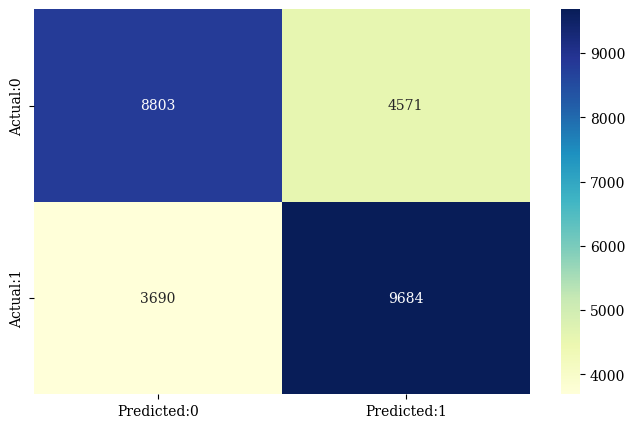

In [24]:
class_weights = {True: 1, False: 1}

threshold = "Bicycles and Motorcycles"

X = df_predictors_selected_VIF.drop(['p5_13_Other',
'Departure Time_Early Evening',
'End Time_Night',
'p5_13_To pick up someone',
'Departure Time_Evening',
'End Time_Evening',
'tloc_4'], axis=1)
y = y_undersampled == threshold
###################

logreg = LogisticRegression(penalty = 'l2', class_weight=class_weights, max_iter = 1000)  ####改关键参数####
logreg.fit(X, y)
y_pred = logreg.predict(X)

# print the coefficient in the model
print("------------------------------------------")
print("Print the model:")
coef_dict = {}
for coef, feat in zip(logreg.coef_.flatten().tolist(), X.columns):
    coef_dict[feat] = coef
    print(feat, ":", coef)
print("------------------------------------------")

acc = sklearn.metrics.accuracy_score(y, y_pred)
print("Accuracy of the model is: " + str(acc))

# Another evaluation: confusion matrix
print("The confusion matrix is:")
cm = confusion_matrix(y, y_pred)
conf_matrix = pd.DataFrame(
    data=cm, columns=["Predicted:0", "Predicted:1"], index=["Actual:0", "Actual:1"]
)

plt.figure(figsize=(8, 5))
sn.heatmap(conf_matrix, annot=True, fmt="d", cmap="YlGnBu")
plt.savefig('confusion matrix2.png')

In [25]:
import statsmodels.api as sm
import numpy as np
import pandas as pd
from scipy import stats

import statsmodels.api as sm
import numpy as np

# 假设你已经有一个 logistic 回归模型对象 model_result
# model_result = sm.Logit(y, X).fit()

# 获取模型残差
residuals = model_result.resid_dev

# 计算分组
observed = np.array(model_result.model.endog)
expected = model_result.fittedvalues
groups = pd.qcut(expected, q=10, labels=False)

# 计算 Hosmer-Lemeshow 统计量
hl_statistic = sum((observed - expected)**2 / (expected * (1 - expected)))
degrees_of_freedom = 8  # 这里的自由度是分组数减去模型参数个数

# 计算 p-value
p_value = 1 - stats.chi2.cdf(hl_statistic, degrees_of_freedom)

# 输出检验统计量和 p-value
print(f"Hosmer-Lemeshow Test Statistic: {hl_statistic}")
print(f"P-value: {p_value}")

# 进行显著性检验，比如设置显著性水平为0.05
alpha = 0.05
if p_value < alpha:
    print("拒绝零假设，模型拟合不好")
else:
    print("接受零假设，模型拟合良好")



Hosmer-Lemeshow Test Statistic: -24.399957662208692
P-value: 1.0
接受零假设，模型拟合良好


### task 7: data visualizaiton(after undersampling)

In [26]:
cycle1 = result1[result1["p5_14"] == 'Bicycles and Motorcycles'].copy()
cycle2 = result2[result2["p5_14"] == 'Bicycles and Motorcycles'].copy()
cycle2

,id_via,p5_14,estrato,tloc,sexo,edad,p5_11a,p5_13,p5_9_1,p5_10_1,time,Time Category,Departure Time,End Time
57,1846,Bicycles and Motorcycles,3,1,1,55,7,Going to work,9,9,0,Short Time,Morning,Morning
59,1848,Bicycles and Motorcycles,3,1,1,55,7,Going to work,15,15,0,Short Time,Afternoon,Afternoon
60,1849,Bicycles and Motorcycles,3,1,1,55,1,Going home,20,21,1,Short Time,Evening,Evening
61,1850,Bicycles and Motorcycles,3,1,1,55,7,Going to work,9,9,0,Short Time,Morning,Morning
62,1851,Bicycles and Motorcycles,3,1,1,55,1,Going home,14,15,1,Short Time,Afternoon,Afternoon
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
446763,528696,Bicycles and Motorcycles,2,2,1,50,1,Going home,12,13,1,Short Time,Afternoon,Afternoon
446882,528844,Bicycles and Motorcycles,2,2,1,34,4,Going to work,6,6,0,Short Time,Morning,Morning
446883,528845,Bicycles and Motorcycles,2,2,1,34,1,Going home,14,14,0,Short Time,Afternoon,Afternoon
446884,528846,Bicycles and Motorcycles,2,2,1,34,4,Going to work,6,6,0,Short Time,Morning,Morning


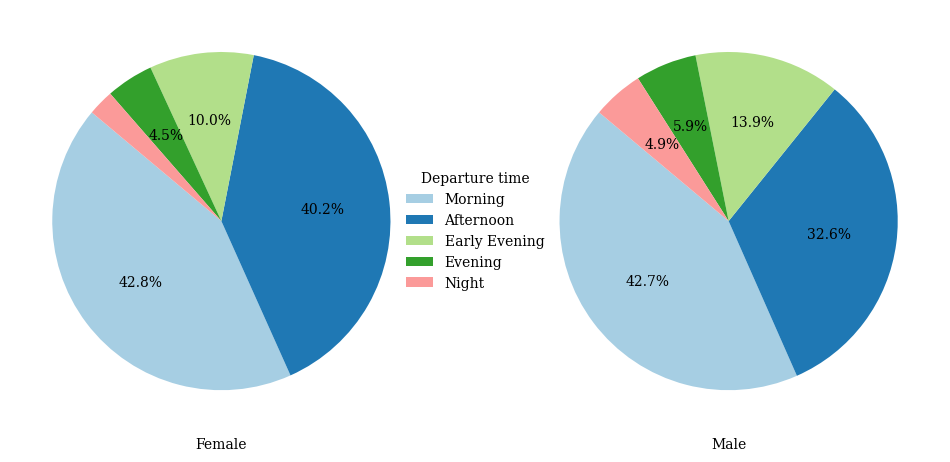

In [27]:
#Departure time
counts_male = cycle2['Departure Time'].value_counts()
counts_female = cycle1['Departure Time'].value_counts()

name1 = counts_female.index
value1 = counts_female.values
name2 = counts_male.index
value2 = counts_male.values

colors = sns.color_palette('Paired', n_colors=len(value1))

# Figure Size
fig, ax = plt.subplots(1,2, figsize=(12, 6))

# Function to format autopct
def func(pct, allvalues):
    absolute = round(pct / 100. * sum(allvalues), 1)
    if pct < 4:
        return ""
    else:
        return f"{pct:.1f}%"

# Plot for Female
ax[0].pie(value1, autopct=lambda pct: func(pct, value1), startangle=140, colors=colors)
ax[0].set_xlabel('Female')

# Plot for Male
ax[1].pie(value2, autopct=lambda pct: func(pct, value2), startangle=140, colors=colors)
ax[1].set_xlabel('Male')

# Add legend to the figure
fig.legend(name1, title='Departure time', loc='center',frameon=False)

plt.savefig('Departure time.png')

plt.show()

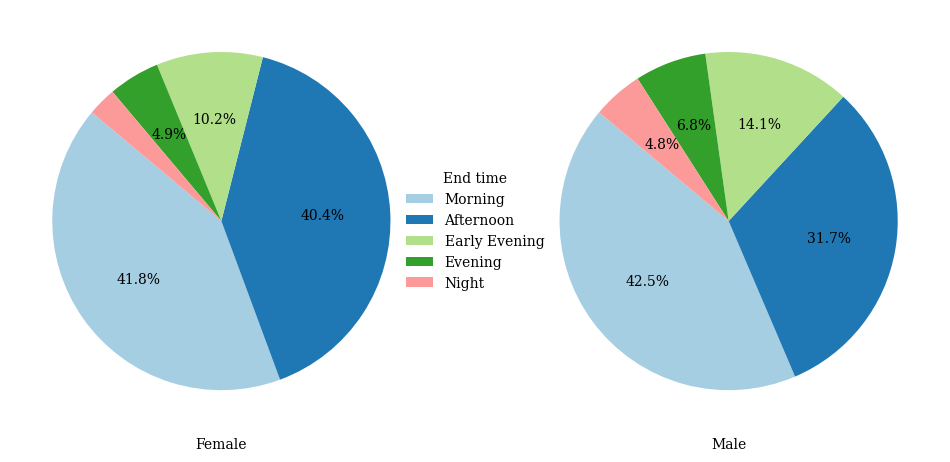

In [28]:
#End time
counts_male = cycle2['End Time'].value_counts()
counts_female = cycle1['End Time'].value_counts()

name1 = counts_female.index
value1 = counts_female.values
name2 = counts_male.index
value2 = counts_male.values

colors = sns.color_palette('Paired', n_colors=len(value1))

# Figure Size
fig, ax = plt.subplots(1,2, figsize=(12, 6))

# Plot for Female
ax[0].pie(value1, autopct=lambda pct: func(pct, value1), startangle=140, colors=colors)
ax[0].set_xlabel('Female')

# Plot for Male
ax[1].pie(value2, autopct=lambda pct: func(pct, value2), startangle=140, colors=colors)
ax[1].set_xlabel('Male')

# Add legend to the figure
fig.legend(name1, title='End time', loc='center',frameon=False)

plt.savefig('End time.png')

plt.show()

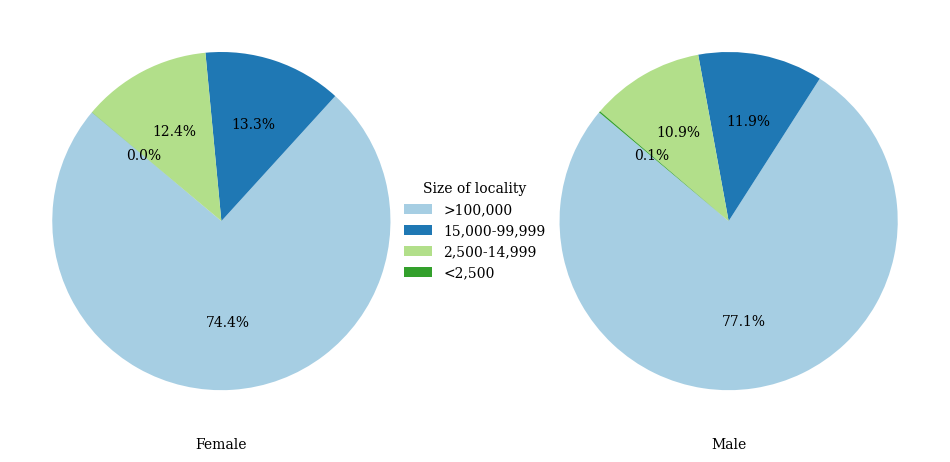

In [29]:
#Size of locality
counts_male = cycle2['tloc'].value_counts()
counts_female = cycle1['tloc'].value_counts()

name1 = counts_female.index
value1 = counts_female.values
name2 = counts_male.index
value2 = counts_male.values

labels = ['>100,000','15,000-99,999','2,500-14,999','<2,500']

# Figure Size
fig, ax = plt.subplots(1,2, figsize=(12, 6))

# Horizontal Bar Plot
ax[0].pie(value1, autopct='%1.1f%%', startangle=140, colors=colors)
ax[0].set_xlabel('Female')

ax[1].pie(value2, autopct='%1.1f%%', startangle=140, colors=colors)
ax[1].set_xlabel('Male')

# Add legend to the figure
fig.legend(labels, title='Size of locality', loc='center',frameon=False)

plt.savefig('Size of locality.png')

plt.show()

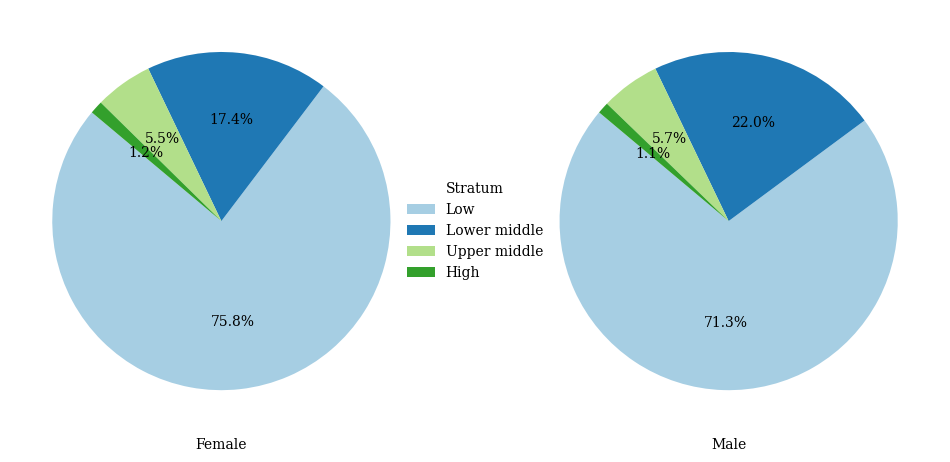

In [30]:
#estrato
counts_male = cycle2['estrato'].value_counts()
counts_female = cycle1['estrato'].value_counts()

name1 = counts_female.index
value1 = counts_female.values
name2 = counts_male.index
value2 = counts_male.values

# 使用 color_palette 生成颜色调色板
colors = sns.color_palette('Paired', n_colors=len(value1))

labels = ['Low','Lower middle','Upper middle','High']

# Figure Size
fig, ax = plt.subplots(1,2, figsize=(12, 6))

# Horizontal Bar Plot
ax[0].pie(value1, autopct='%1.1f%%', startangle=140, colors=colors)
ax[0].set_xlabel('Female')

ax[1].pie(value2, autopct='%1.1f%%', startangle=140, colors=colors)
ax[1].set_xlabel('Male')

# Add legend to the figure
fig.legend(labels, title='Stratum', loc='center',frameon=False)

plt.savefig('Stratum.png')

plt.show()

In [31]:
counts_female

estrato
2    3280
3     755
4     239
1      54
Name: count, dtype: int64

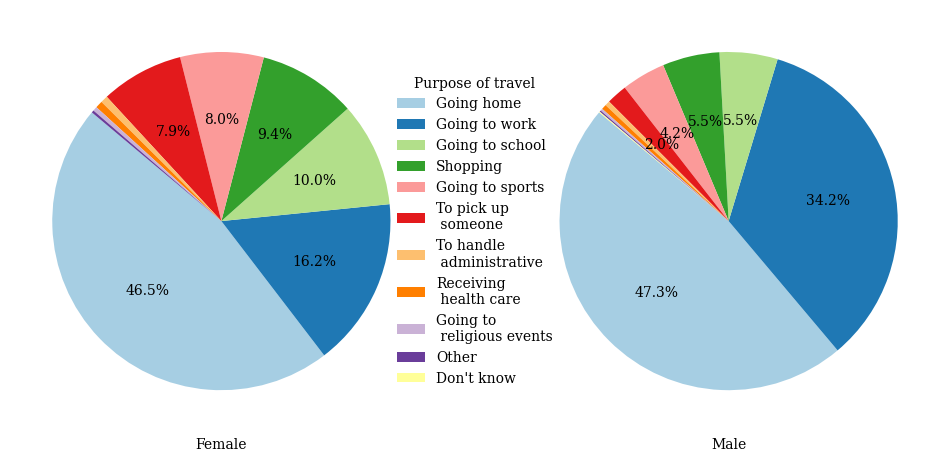

In [32]:
#Purpose of travel
counts_male = cycle2['p5_13'].value_counts()
counts_female = cycle1['p5_13'].value_counts()

name1 = counts_female.index
value1 = counts_female.values
name2 = counts_male.index
value2 = counts_male.values

colors = sns.color_palette('Paired', n_colors=len(value1))

labels = ['Going home', 'Going to work', 'Going to school', 'Shopping', 'Going to sports', 'To pick up\n someone',
          'To handle\n administrative', 'Receiving\n health care', 'Going to\n religious events', 'Other', "Don't know"]

# Figure Size
fig, ax = plt.subplots(1,2, figsize=(12, 6))

# Function to format autopct
def func(pct, allvalues):
    absolute = round(pct / 100. * sum(allvalues), 1)
    if pct < 1:
        return ""
    else:
        return f"{pct:.1f}%"

# Plot for Female
ax[0].pie(value1, autopct=lambda pct: func(pct, value1), startangle=140, colors=colors)
ax[0].set_xlabel('Female')

# Plot for Male
ax[1].pie(value2, autopct=lambda pct: func(pct, value2), startangle=140, colors=colors)
ax[1].set_xlabel('Male')

# Add legend to the figure
fig.legend(labels, title='Purpose of travel', loc='center',frameon=False)

plt.savefig('purpose of travel.png')

plt.show()

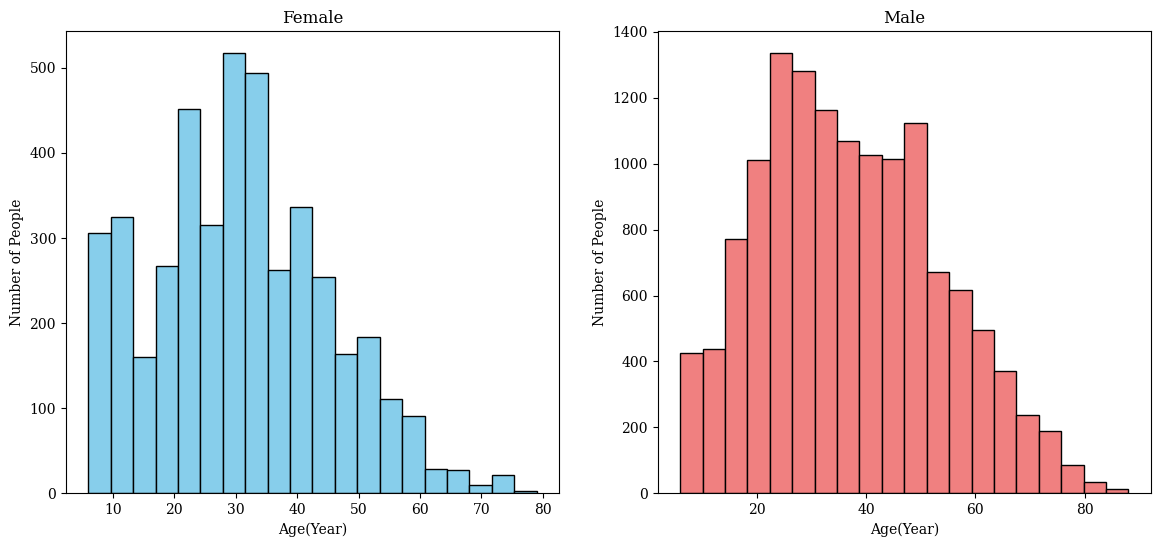

In [33]:
# Figure Size
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

## Histogram
ax[0].hist(cycle1['edad'], bins=20, color='skyblue', edgecolor='black')
ax[0].set_xlabel('Age(Year)')
ax[0].set_ylabel('Number of People')
ax[0].set_title('Female')

ax[1].hist(cycle2['edad'], bins=20, color='lightcoral', edgecolor='black')
ax[1].set_xlabel('Age(Year)')
ax[1].set_ylabel('Number of People')
ax[1].set_title('Male')

plt.savefig('age.png')
plt.show()

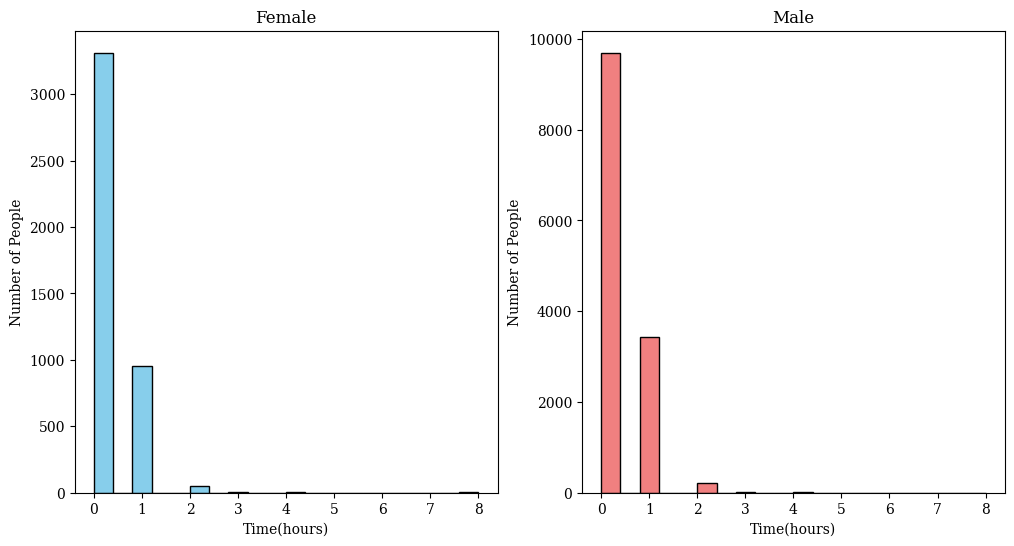

In [34]:
# Figure Size
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

## Histogram
ax[0].hist(cycle1['time'], bins=20, color='skyblue', edgecolor='black')
ax[0].set_xlabel('Time(hours)')
ax[0].set_ylabel('Number of People')
ax[0].set_title('Female')

ax[1].hist(cycle2['time'], bins=20, color='lightcoral', edgecolor='black')
ax[1].set_xlabel('Time(hours)')
ax[1].set_ylabel('Number of People')
ax[1].set_title('Male')

plt.savefig('time.png')
plt.show()